<a href="https://colab.research.google.com/github/Divya1916/project/blob/main/Twitter_Hatespeech_Detection_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Basic Libraries**

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


 **Import** **Dataset**

In [2]:
# training data
train = pd.read_csv("/content/train.csv")

# test data
test = pd.read_csv("/content/test.csv")

**Data Exploration (Exploratory Data Analysis)**

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
train.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
test.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


**Visualization**

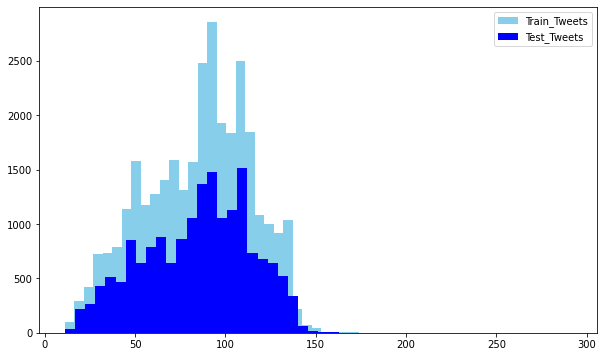

In [7]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train , bins=50 , label="Train_Tweets", color = "skyblue" )
plt.hist(length_test , bins=50 , label="Test_Tweets", color = "blue" )
plt.legend()

**non-racist/sexist / racist/sexist related tweets**

In [8]:
#non-racist/sexist related tweets
sum(train["label"] == 0 )

29720

In [9]:
#racist/sexist related tweets
sum(train["label"] ==1 )

2242

In [10]:
# check if there are any missing values
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

**Data cleaning**

In [11]:
#install tweet-preprocessor to clean tweets
!pip install tweet-preprocessor

In [12]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [13]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [14]:
# clean training data
train_tweet = clean_tweets(train["tweet"])
train_tweet = pd.DataFrame(train_tweet)

In [15]:
# append cleaned tweets to the training data
train["clean_tweet"] = train_tweet

In [16]:
# compare the cleaned and uncleaned tweets
train.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now
5,6,0,[2/2] huge fan fare and big talking before the...,2 2 huge fan fare and big talking before they ...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams can...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here im its so


In [17]:
train.tail()

,id,label,tweet,clean_tweet
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",vandalised in in condemns act
31961,31962,0,thank you @user for you follow,thank you for you follow


In [18]:
# clean testing data
test_tweet = clean_tweets(test["tweet"])
test_tweet = pd.DataFrame(test_tweet)

In [19]:
# append cleaned tweets to the testing data
test["clean_tweet"] = test_tweet

In [20]:
# compare the cleaned and uncleaned tweets
test.head(10)

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,to find
1,31964,@user #white #supremacists want everyone to s...,want everyone to see the new and heres why
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd to my amazing hilarious eli ahmir uncle dav...
5,31968,choose to be :) #momtips,choose to be
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,something inside me dies eyes ness
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,
8,31971,@user @user @user i will never understand why...,i will never understand why my dad left me whe...
9,31972,#delicious #food #lovelife #capetown mannaep...,mannaepicure


In [21]:
test.tail()

,id,tweet,clean_tweet
17192,49155,thought factory: left-right polarisation! #tru...,thought factory left right polarisation &gt3
17193,49156,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,today in omg &amp used words like assets&ampli...
17195,49158,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...
17196,49159,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download


**Test And Train Split**

In [22]:
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = train.label.values

# use 70% for the training and 30% for the test
x_train, x_test, y_train, y_test = train_test_split(train.clean_tweet.values, y, 
                                                    stratify=y, 
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)

**Vectorize tweets using CountVectorizer**

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

 **Model building**

Support Vetor Classifier (SVC)

In [24]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train).predict_proba(x_test_vec)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

**Accuracy score for SVC**

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  94.86912086766085 %


**Confusion Matrix**

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_svm)

array([[8773,  143],
       [ 349,  324]])

**Classification Report**

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm,target_names="hate","non-hate"(0,1)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8916
           1       0.69      0.48      0.57       673

    accuracy                           0.95      9589
   macro avg       0.83      0.73      0.77      9589
weighted avg       0.94      0.95      0.94      9589



In [28]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, y_pred_svm)

In [29]:
precision

array([0.07018459, 0.69379015, 1.        ])

In [30]:
recall

array([1.        , 0.48142645, 0.        ])

In [31]:
review = """SUPERB, I AM IN LOVE IN THIS PHONE"""
review_vector = vectorizer.transform([review]) # vectorizing
print(svm.predict(review_vector))

[0]
